
# Project: House Price Prediction

## Table of Contents
* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Insights from Exploratoty Analysis
* Training and Evaluation of Regression Modles
* Making Predictions with Test Data
* Conclusions

## Introduction

> In this project we aim to use machine learning regression algorithms to predict house prices. We will be training with a dataset that contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

In [55]:
# importing necessary libraries
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Wrangling

> In this section we will import our dataset and examine it's features. We will also carry out feature engineering and data cleaning if it is necessary.

### General Properties

In [56]:
# Loading our test and train datasets
pd.set_option('display.max_columns', None) # make pandas display all columns
pd.set_option('display.max_rows', None)
df_train = pd.read_csv('house_price_prediction_train.csv')
df_test = pd.read_csv('house_price_prediction_test.csv')

In [57]:
# puting column names in lowercase
df_train.columns = [x.lower() for x in df_train.columns]
df_test.columns = [x.lower() for x in df_test.columns]

In [83]:
# inpecting our train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1460 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          1460 non-null   object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [84]:
# checking for percentage of missing values in columns
df_train.isna().sum()/len(df_train)*100

id               0.0
mssubclass       0.0
mszoning         0.0
lotfrontage      0.0
lotarea          0.0
street           0.0
alley            0.0
lotshape         0.0
landcontour      0.0
utilities        0.0
lotconfig        0.0
landslope        0.0
neighborhood     0.0
condition1       0.0
condition2       0.0
bldgtype         0.0
housestyle       0.0
overallqual      0.0
overallcond      0.0
yearbuilt        0.0
yearremodadd     0.0
roofstyle        0.0
roofmatl         0.0
exterior1st      0.0
exterior2nd      0.0
masvnrtype       0.0
masvnrarea       0.0
exterqual        0.0
extercond        0.0
foundation       0.0
bsmtqual         0.0
bsmtcond         0.0
bsmtexposure     0.0
bsmtfintype1     0.0
bsmtfinsf1       0.0
bsmtfintype2     0.0
bsmtfinsf2       0.0
bsmtunfsf        0.0
totalbsmtsf      0.0
heating          0.0
heatingqc        0.0
centralair       0.0
electrical       0.0
1stflrsf         0.0
2ndflrsf         0.0
lowqualfinsf     0.0
grlivarea        0.0
bsmtfullbath 

In [85]:
#checking for the percentage of missing values in the test data
df_test.isna().sum()/len(df_test)*100

id               0.0
mssubclass       0.0
mszoning         0.0
lotfrontage      0.0
lotarea          0.0
street           0.0
alley            0.0
lotshape         0.0
landcontour      0.0
utilities        0.0
lotconfig        0.0
landslope        0.0
neighborhood     0.0
condition1       0.0
condition2       0.0
bldgtype         0.0
housestyle       0.0
overallqual      0.0
overallcond      0.0
yearbuilt        0.0
yearremodadd     0.0
roofstyle        0.0
roofmatl         0.0
exterior1st      0.0
exterior2nd      0.0
masvnrtype       0.0
masvnrarea       0.0
exterqual        0.0
extercond        0.0
foundation       0.0
bsmtqual         0.0
bsmtcond         0.0
bsmtexposure     0.0
bsmtfintype1     0.0
bsmtfinsf1       0.0
bsmtfintype2     0.0
bsmtfinsf2       0.0
bsmtunfsf        0.0
totalbsmtsf      0.0
heating          0.0
heatingqc        0.0
centralair       0.0
electrical       0.0
1stflrsf         0.0
2ndflrsf         0.0
lowqualfinsf     0.0
grlivarea        0.0
bsmtfullbath 

### Handeling Missing Data

In [61]:
# from the data description we know null values have no alley access
df_train['alley'].fillna('No Alley',inplace=True) 
df_test['alley'].fillna('No Alley',inplace=True)

In [62]:
# filling masvnrtype and masvnrarea with mode and average values respectively
train_mode = df_train.masvnrtype.value_counts().index[0]
train_mean = df_train.masvnrarea.mean()
test_mean = df_test.masvnrtype.value_counts().index[0]
test_mode = df_test.masvnrarea.mean()
df_train['masvnrtype'].fillna(train_mode,inplace=True)
df_train['masvnrarea'].fillna(train_mean,inplace=True)
df_test['masvnrtype'].fillna(test_mode,inplace=True)
df_test['masvnrarea'].fillna(test_mean,inplace=True)

In [63]:
#filling null values in basement columns with not available
basement_cols = ['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2','bsmtfinsf1','bsmtfinsf2','totalbsmtsf',
                'bsmtfullbath','bsmthalfbath','bsmtunfsf']
for i in basement_cols:
    df_train[i].fillna('No Basement',inplace=True)
    df_test[i].fillna('No Basement',inplace=True)

In [64]:
# dropping columns with over 40% of missing data in the training data
drop = ['fireplacequ','poolqc','fence','miscfeature']
df_train = df_train.drop(drop,axis=1)
df_test = df_test.drop(drop,axis=1)

In [65]:
# filling the null values in the electrical column with the mode of the column
mode = df_train.electrical.value_counts().head(1).index[0]
df_train['electrical'].fillna(mode,inplace=True)

In [78]:
# handling missing data in the garage columns, replacing null values with mode
garage_cols = ('garagetype','garageyrblt','garagefinish','garagecars','garagearea','garagequal','garagecond')
for i in garage_cols:
    df_train[i].fillna(df_train[i].value_counts().head(1).index[0],inplace=True)
    df_test[i].fillna(df_test[i].value_counts().head(1).index[0],inplace=True)

In [75]:
# filling the null values in mszoning, utilities, exterior1st and exterior2nd columns
for i in ('mszoning', 'utilities', 'exterior1st', 'exterior2nd','kitchenqual','functional','saletype'):
    df_test[i].fillna(df_test[i].value_counts().head(1).index[0],inplace=True)

In [11]:
# filling lotfrontage values with the mean 
train_mean = df_train.lotfrontage.mean()
test_mean = df_test.lotfrontage.mean()
df_train['lotfrontage'].fillna(train_mean,inplace=True)
df_test['lotfrontage'].fillna(test_mean,inplace=True)

In [82]:
# filling missing values in the lotfrontage column with the mean values
train_mean = df_train['lotfrontage'].mean()
test_mean = df_test['lotfrontage'].mean()
df_train['lotfrontage'].fillna(train_mean,inplace=True)
df_test['lotfrontage'].fillna(test_mean,inplace=True)

In [88]:
# inspecting our train data for other inconsistencies
df_train.sample(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
915,916,160,RM,21.000000,2001,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,Fa,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,6,Typ,0,Attchd,1970.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,0,1,2007,WD,Normal,75000
440,441,20,RL,105.000000,15431,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,0,4,2009,WD,Normal,555000
953,954,60,RL,70.049958,11075,Pave,No Alley,IR1,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,5,4,1969,1969,Gable,CompShg,HdBoard,HdBoard,BrkFace,232.0,TA,TA,CBlock,TA,TA,Av,ALQ,562,LwQ,193,29,784,GasA,Ex,Y,SBrkr,1168,800,0,1968,0,1,2,1,4,1,TA,7,Min2,1,Attchd,1969.0,RFn,2,530,TA,TA,Y,305,189,0,0,0,0,400,9,2008,WD,Normal,172000
854,855,20,RL,102.000000,17920,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1955,1974,Hip,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,306,Rec,1085,372,1763,GasA,TA,Y,SBrkr,1779,0,0,1779,1,0,1,1,3,1,TA,6,Typ,1,Attchd,1955.0,Unf,2,454,TA,TA,Y,0,418,0,0,312,0,0,7,2006,WD,Abnorml,170000
811,812,120,RM,70.049958,4438,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,169.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,662,Unf,0,186,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,4,Typ,1,Attchd,2004.0,Fin,2,420,TA,TA,Y,140,0,0,0,0,0,0,6,2008,ConLD,Normal,144500
118,119,60,RL,90.000000,12376,Pave,No Alley,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1990,1990,Hip,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1470,Unf,0,203,1673,GasA,Gd,Y,SBrkr,1699,1523,0,3222,1,0,3,0,5,1,Gd,11,Typ,2,Attchd,1990.0,Unf,3,594,TA,TA,Y,367,0,0,0,0,0,0,5,2010,WD,Normal,320000
842,843,80,RL,82.000000,9020,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkFace,183.0,TA,TA,CBlock,TA,TA,Gd,Rec,312,ALQ,539,276,1127,GasA,TA,Y,SBrkr,1165,0,0,1165,1,0,1,1,3,1,TA,6,Typ,0,Attchd,1966.0,RFn,2,490,Gd,Gd,Y,0,129,0,0,0,0,0,5,2008,WD,Normal,174900
1027,1028,20,RL,71.000000,9520,Pave,No Alley,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,338.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1513,Unf,0,125,1638,GasA,Ex,Y,SBrkr,1646,0,0,1646,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2008.0,RFn,3,800,TA,TA,Y,192,44,0,0,0,0,0,4,2008,New,Partial,293077
302,303,20,RL,118.000000,13704,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,150.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1541,1541,GasA,Ex,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,3,843,TA,TA,Y,468,81,0,0,0,0,0,1,2006,WD,Normal,205000
117,118,20,RL,74.000000,8536,Pave,No Alley,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1125,1125,GasA,Gd,Y,SBrkr,1125,0,0,1125,0,0,1

## Exploratory Data Analysis

Text(0, 0.5, 'Count')

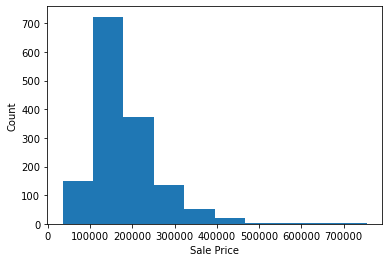

In [97]:
# cheching for the distibution of our target variable
plt.hist('saleprice',data=df_train)
plt.xlabel('Sale Price')
plt.ylabel('Count')

### Research Question 2  (Replace this header name!)

In [13]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


## Insights from Exploratoty Analysis